Факторный анализ
==================

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
matplotlib.style.use('ggplot')
%matplotlib inline

Будем анализировать поведение самцов корюшки.

LUNGES Количество нападений (удары) на модель самца.<br>
BITES Количество нападений (укусы) на модель самца.<br>
ZIGZAGS	Плавание зигзагом, которое является частью поведения, направленного на привлечение самок.<br>
NEST Действия, связанные с построением гнезда.<br>
SPINES Число раз, когда топорщился колючий верхний плавник.<br>
DNEST Суммарная длительность времени, проведенного за построением гнезда.<br>
BOUT Количество элементов поведения, характеризующих готовность к схватке.<br>

In [2]:
df = pd.read_csv('stickleback.csv', sep=';', decimal=',')
df.head()

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,79.0,25.0,0.0,0.0,15.0,0.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,136.0,58.0,6.0,0.0,15.0,0.0,148.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,115.0,30.0,2.0,1.0,9.0,5.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,129.0,139.0,16.0,0.0,22.0,0.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,120.0,58.0,15.0,15.0,14.0,82.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df.filter(regex='^(?!.*Unnamed).*$')
df.head()

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
0,79.0,25.0,0.0,0.0,15.0,0.0,45.0
1,136.0,58.0,6.0,0.0,15.0,0.0,148.0
2,115.0,30.0,2.0,1.0,9.0,5.0,29.0
3,129.0,139.0,16.0,0.0,22.0,0.0,69.0
4,120.0,58.0,15.0,15.0,14.0,82.0,9.0


In [4]:
df.describe()

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,131.185185,69.055556,7.277778,1.425926,18.425926,34.259259,89.314815
std,50.771064,43.428283,6.693891,3.000641,8.712606,56.491170,98.679742
min,41.000000,3.000000,0.000000,0.000000,5.000000,0.000000,6.000000
25%,99.000000,34.250000,2.250000,0.000000,14.000000,0.000000,23.500000
50%,127.000000,60.000000,5.000000,0.000000,16.000000,0.000000,45.000000
75%,156.750000,84.250000,10.750000,1.000000,24.750000,73.000000,125.000000
max,277.000000,175.000000,26.000000,15.000000,46.000000,199.000000,306.000000


In [5]:
df.corr()

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
LUNGES,1.000000,0.688077,-0.139336,-0.164133,0.055567,-0.228568,0.233314
BITES,0.688077,1.000000,-0.042761,-0.148884,0.373382,-0.217563,0.117316
ZIGZAGS,-0.139336,-0.042761,1.000000,0.351894,0.067813,0.091315,-0.160693
NEST,-0.164133,-0.148884,0.351894,1.000000,-0.052538,0.514028,-0.305876
SPINES,0.055567,0.373382,0.067813,-0.052538,1.000000,-0.051099,-0.041483
DNEST,-0.228568,-0.217563,0.091315,0.514028,-0.051099,1.000000,-0.242177
BOUT,0.233314,0.117316,-0.160693,-0.305876,-0.041483,-0.242177,1.000000


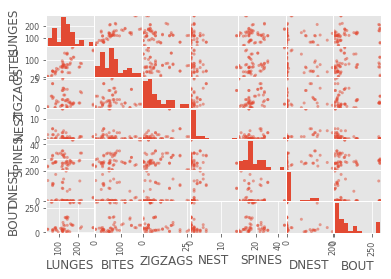

In [6]:
from pandas.plotting import scatter_matrix
scatter_matrix(df);

Видим, что данные фичи далеки от нормальных, корреляции между фичами не наблюдается. 

In [ ]:

Метод главных компонент
=============

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
   


Cтандартизируем переменные. Из предварительного анализа видно, что это важно.

In [8]:
import math
from sklearn import preprocessing
#  from sklearn.decomposition import PCA


# Функция для стандартизации фич
def scale_features(df):
    scaled = preprocessing.StandardScaler().fit_transform(df)
    scaled = pd.DataFrame(scaled, columns=df.columns)
    return scaled


In [9]:
df_scaled = preprocessing.scale(df)

Попробуем с помощью метода главных компонент спроецировать 
данные на двумерную плоскость. 
То есть выделим две главных компоненты. 
Реализация метода содержится в классе ```PCA``` 
библиотеки ```sklearn.decomposition```.



In [11]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=3)
pca.fit(df_scaled)
print(pca.explained_variance_ratio_)


[0.32687739 0.20774873 0.13987346]


Координаты самих компонент находятся в атрибуте ```components_```.

In [15]:
print (pca.components_)

[[-0.47012791 -0.45897962  0.24811772  0.43535559 -0.16394905  0.42179779
  -0.33530269]
 [ 0.31046609  0.50737164  0.37893225  0.40026456  0.46520814  0.22423164
  -0.2751091 ]
 [ 0.48163265  0.12992711 -0.24381636  0.32733909 -0.62180282  0.39879993
   0.1971586 ]]


In [16]:
print ('Explained variance by component: %s' % pca.explained_variance_ratio_)

Explained variance by component: [0.32687739 0.20774873 0.13987346]


In [17]:
pca.singular_values_

array([11.11573903,  8.86166018,  7.27132493])

In [18]:
pca.explained_variance_ratio_

array([0.32687739, 0.20774873, 0.13987346])

In [23]:
zzz = pca.transform(df_scaled)

In [24]:
zzz

array([[ 0.43548142, -1.64669341, -0.60887645],
       [-0.57810499, -0.85271451,  0.02370697],
       [ 0.4734641 , -1.3749152 ,  0.22311247],
       [-0.86464136,  1.23027304, -0.82995958],
       [ 3.21866694,  2.24827324,  1.56734852],
       [-1.052399  ,  1.38648517, -0.38617423],
       [-2.61590674,  2.46582659, -1.54282384],
       [ 1.04929916,  0.20661276, -0.24291867],
       [-2.13223362, -0.55315166,  1.01988416],
       [ 2.02009165, -0.41143077,  0.09088797],
       [ 0.36063068, -0.02476881, -1.49515   ],
       [ 0.97948675,  0.25108044, -0.24965378],
       [-2.16370354, -0.53744841,  1.0506272 ],
       [ 0.10543508, -0.91355441, -0.12802207],
       [ 2.725405  ,  1.28942123, -0.86645388],
       [ 0.4548321 , -1.16706377, -0.77057737],
       [ 0.48999679, -1.66916561, -0.68995618],
       [ 0.38071857, -1.26181777,  0.07724223],
       [-2.37858607,  1.3058442 ,  2.10630527],
       [-1.68529819, -0.16401596,  0.3660187 ],
       [ 2.02265315, -0.38262677,  0.066

Факторный анализ
=========


http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html
 

Попробуем с помощью факторного анализа построить новые фичи, которые были бы более удобными в использовании с минимальной потерей информации.

Используем класс ```FactorAnalysis``` из ```sklearn.decomposition```. 
Начнём с двух факторов.

In [20]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=2)
fa.fit(df_scaled)

FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=2,
        noise_variance_init=None, random_state=0, svd_method='randomized',
        tol=0.01)

Координаты факторов в пространстве старых фич находятся в атрибуте ```components_```.

In [21]:
pd.DataFrame(fa.components_, columns=df.columns)

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
0,0.715035,0.956805,-0.086423,-0.241141,0.358615,-0.282219,0.166892
1,-0.019296,0.098533,0.367721,0.848657,0.073328,0.513705,-0.329849


Видим, что первый (нулевой) фактор сильно коррелирует с фичами-нападениями (ударами и укусами), так что его можно интерпретировать как агрессивность самца. Второй же фактор, напротив, коррелирует с фичами, связанными с обустройство гнезда, что можно расценивать как "домовитость". То есть мы свели пространство из семи фич к двум новым интерпретируемым фичам.

Уникальность фич в смысле дисперсии, объяснённой факторами (чем больше, тем хуже объясняется факторами) содержится в атрибуте ```noise_variance_```.

In [22]:
print('Uniqueness:')
pd.Series(fa.noise_variance_, df.columns)

Uniqueness:


LUNGES     0.487766
BITES      0.076163
ZIGZAGS    0.857251
NEST       0.222906
SPINES     0.866169
DNEST      0.656093
BOUT       0.863093
dtype: float64

Наконец, сами факторы (как новые векторы-фичи) можно получить, применив метод ```transform```.

In [23]:
scores = pd.DataFrame(fa.transform(df_scaled), columns=['factor1', 'factor2'])
scores.head()

,factor1,factor2
0,-0.938788,-0.776068
1,-0.159453,-0.591389
2,-0.818776,-0.458188
3,1.444012,0.094633
4,-0.638620,3.662073


In [24]:
scores

,factor1,factor2
0,-0.938788,-0.776068
1,-0.159453,-0.591389
2,-0.818776,-0.458188
3,1.444012,0.094633
4,-0.638620,3.662073
5,0.397292,-0.037810
6,2.342290,0.179116
7,-0.151254,0.045436
8,1.072923,-0.406284
9,-0.908872,0.227997


Попробуем теперь построить не два, а три фактора. Что изменится?

In [38]:
fa = FactorAnalysis(n_components=3)
fa.fit(df_scaled)
pd.DataFrame(fa.components_, columns=df.columns)

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
0,0.832106,0.851016,-0.180171,-0.390928,0.261270,-0.375792,0.267079
1,0.178973,0.241522,0.331612,0.808428,0.099520,0.441922,-0.266378
2,-0.301530,0.213190,0.145993,-0.051025,0.592552,-0.020361,-0.175361


Первые два фактора сохранили свой смысл -- агрессивность и домовитость (только корреляции чуть уменьшились), а вот третий фактор интерпретировать уже сложно. Он коррелирует только с одной фичей SPINES, а значит не несёт какой-то новой информации. Так что всё же лучше оставить только два фактора.